## Data fields

Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- **LotArea: Lot size in square feet**
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- **LandContour: Flatness of the property**
- **Utilities: Type of utilities available**
- LotConfig: Lot configuration
- **LandSlope: Slope of property**
- **Neighborhood: Physical locations within Ames city limits**
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- **BldgType: Type of dwelling**
- **HouseStyle: Style of dwelling**
- **OverallQual: Overall material and finish quality**
- **OverallCond: Overall condition rating**
- **YearBuilt: Original construction date**
- **YearRemodAdd: Remodel date**
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- **TotalBsmtSF: Total square feet of basement area**
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- **GrLivArea: Above grade (ground) living area square feet**
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- **GarageArea: Size of garage in square feet**
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- **PoolArea: Pool area in square feet**
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [1]:
# data analysis and wrangling
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 9 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        vmax=.8
    )
    
def plot_corvariance( df, var, target = "SalePrice" ):
    data = pd.concat([df[target], df[var]], axis=1)
    data.plot.scatter(x=var, y=target)
    
def plot_box( df, var ):
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.xticks(rotation=90)

def check_null(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    stats = pd.concat([total, percent], axis=1, keys=['Total_Null', 'Percent_Null'])
    return stats

def group_by(dimen, metric = ["Id"], agg_func=["count"]):
    mo_train = train[dimen + metric].groupby(dimen).agg(agg_func)
    mo_test = test[dimen + metric].groupby(dimen).agg(agg_func)
    res = mo_train.join(mo_test, lsuffix='_Train', rsuffix='_Test')
    return res

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [6]:
train["Target"] = np.log(train["SalePrice"])

# Feature Engineering

## Outlier

In [7]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False)[:20]

SalePrice       1.000000
Target          0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


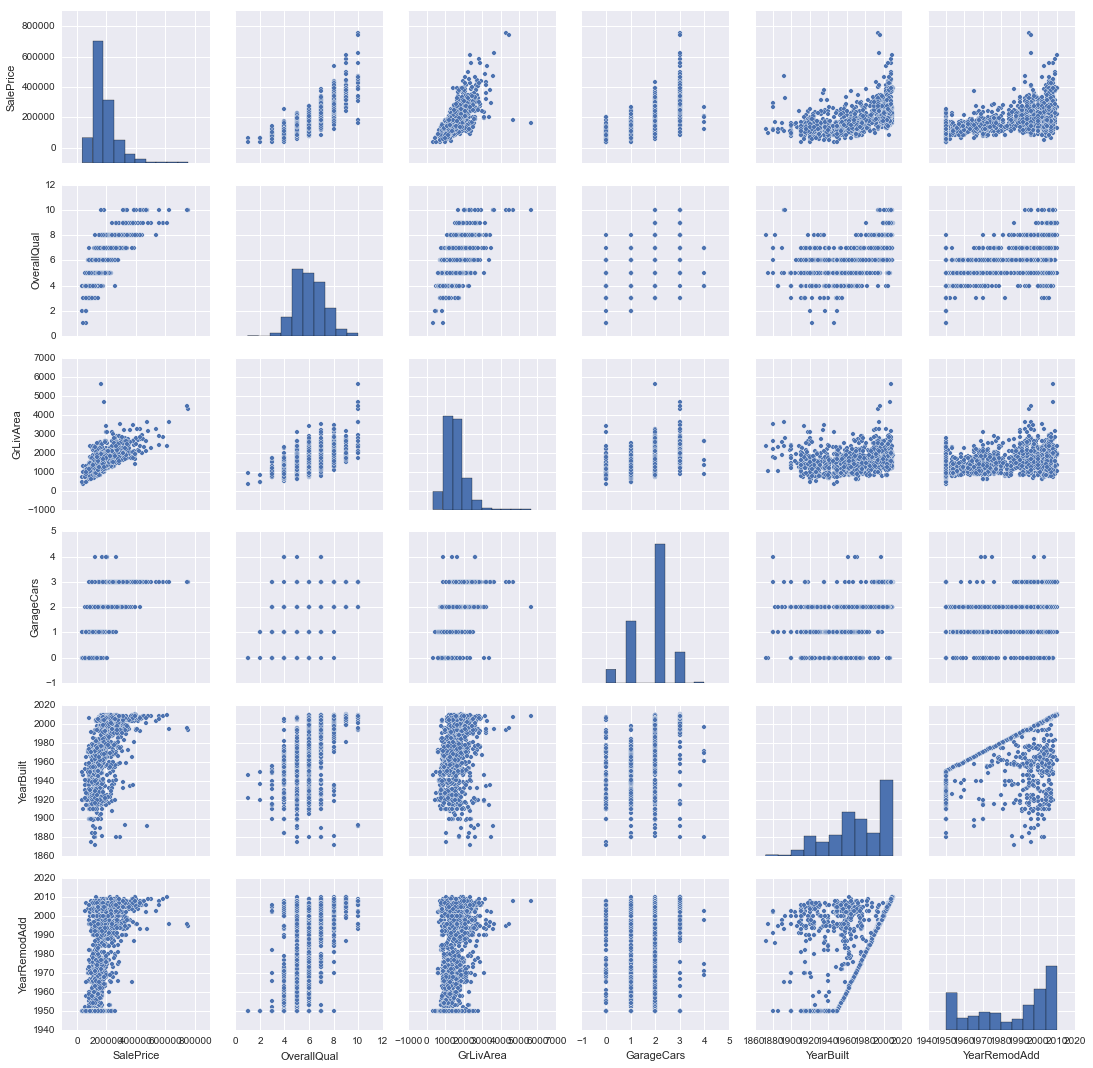

In [8]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'BsmtQual', "YearBuilt", "YearRemodAdd"]
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [9]:
train["BldgType"].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

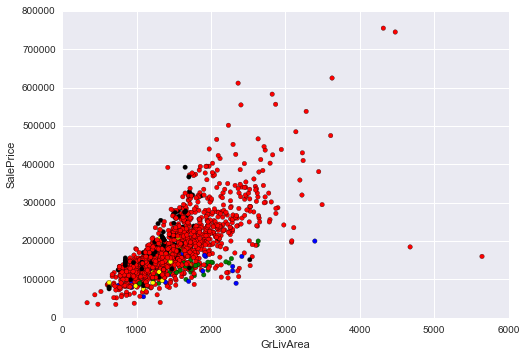

In [10]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
color_map = {"1Fam": "red", "2fmCon": "blue", "Duplex": "green", "TwnhsE": "black", "Twnhs": "yellow"}
data = pd.concat([train['SalePrice'], train["GrLivArea"], train["BldgType"]], axis=1)
data.plot.scatter(x="GrLivArea", y='SalePrice', c = data["BldgType"].apply(lambda x: color_map[x]), ylim=(0,800000));

In [11]:
train.loc[ (train["GrLivArea"] > 4000 ) & (train["SalePrice"] < 200000)][ ["SalePrice", "OverallQual", "KitchenQual", "GarageCars", "SaleType", "SaleCondition", "GrLivArea", "YearRemodAdd", "YrSold"] ]

,SalePrice,OverallQual,KitchenQual,GarageCars,SaleType,SaleCondition,GrLivArea,YearRemodAdd,YrSold
523,184750,10,Ex,3,New,Partial,4676,2008,2007
1298,160000,10,Ex,2,New,Partial,5642,2008,2008


In [12]:
train.drop(train.index[ [523, 1298] ], inplace=True)

In [13]:
## Data fields
train.loc[ (train["YearBuilt"] < 1900 ) & (train["SalePrice"] > 250000)][ ["SalePrice", "OverallQual", "KitchenQual", "GarageCars", "SaleType", "SaleCondition", "GrLivArea", "YearRemodAdd", "YrSold"] ]

,SalePrice,OverallQual,KitchenQual,GarageCars,SaleType,SaleCondition,GrLivArea,YearRemodAdd,YrSold
185,475000,10,Ex,3,WD,Normal,3608,1993,2006
304,295000,7,Gd,3,WD,Normal,3493,2002,2008
583,325000,10,Gd,2,WD,Normal,2775,2000,2008
747,265979,7,Gd,4,WD,Normal,2640,2003,2009


In [14]:
test.loc[666, ["GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageCars", "GarageArea", "YearBuilt"]]

GarageQual       NaN
GarageCond       NaN
GarageFinish     NaN
GarageYrBlt      NaN
GarageCars         1
GarageArea       360
YearBuilt       1910
Name: 666, dtype: object

In [15]:
test[ ["GarageQual", "GarageCond", "GarageFinish"] ].mode()

,GarageQual,GarageCond,GarageFinish
0,TA,TA,Unf


In [16]:
test.loc[666, ["GarageYrBlt", "YearRemodAdd", "YearBuilt"] ]

GarageYrBlt      NaN
YearRemodAdd    1983
YearBuilt       1910
Name: 666, dtype: object

In [17]:
test[ ["GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageCars", "GarageArea"] ].describe()

,GarageYrBlt,GarageCars,GarageArea
count,1381.000000,1458.000000,1458.000000
mean,1977.721217,1.766118,472.768861
std,26.431175,0.775945,217.048611
min,1895.000000,0.000000,0.000000
25%,1959.000000,1.000000,318.000000
50%,1979.000000,2.000000,480.000000
75%,2002.000000,2.000000,576.000000
max,2207.000000,5.000000,1488.000000


In [18]:
test.loc[666, "GarageQual"] = "TA"
test.loc[666, "GarageCond"] = "TA"
test.loc[666, "GarageFinish"] = "Unf"
test.loc[666, "GarageYrBlt"] = 1983 # Same year as remodel add

In [19]:
# GarageType of Test data 1116 is very likely be wrong since all other Garage relatd info are all missing. 
# It is more likely to be a house without garage, set it as "NA" for now
test.loc[ pd.isnull(test["GarageCars"]), "GarageType"] = np.nan

## Null value

In [20]:
train_stats = check_null(train)
test_stats = check_null(test)
stats = train_stats.join(test_stats, lsuffix='_Train', rsuffix='_Test')
stats.loc[(stats['Total_Null_Train'] >0 ) | (stats['Total_Null_Test']> 0 )]

,Total_Null_Train,Percent_Null_Train,Total_Null_Test,Percent_Null_Test
PoolQC,1452,0.995885,1456.0,0.997944
MiscFeature,1404,0.962963,1408.0,0.965045
Alley,1367,0.937586,1352.0,0.926662
Fence,1177,0.807270,1169.0,0.801234
FireplaceQu,690,0.473251,730.0,0.500343
LotFrontage,259,0.177641,227.0,0.155586
GarageQual,81,0.055556,77.0,0.052776
GarageCond,81,0.055556,77.0,0.052776
GarageFinish,81,0.055556,77.0,0.052776
GarageType,81,0.055556,77.0,0.052776


### Garage related columns

In [21]:
garage_cols = filter(lambda col: col.find("Garage") >= 0, train.columns)
print(garage_cols)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


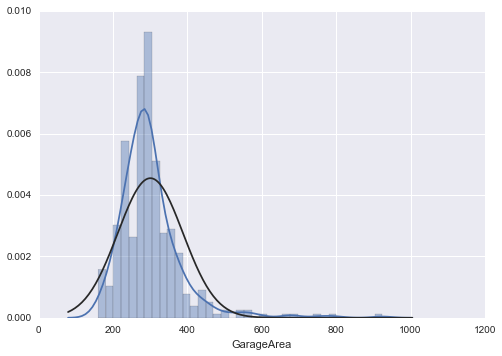

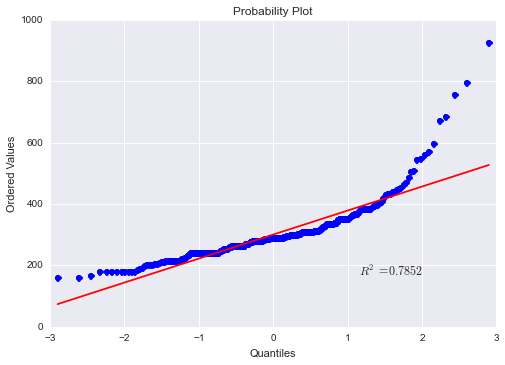

In [22]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot( train.loc[train["GarageCars"] == 1]["GarageArea"], fit=norm);
fig = plt.figure()
res = stats.probplot( train.loc[train["GarageCars"] == 1]["GarageArea"], plot=plt)

In [23]:
train[ ["GarageCars", "GarageArea"] ].groupby(["GarageCars"]).agg({"mean", "median", "std", "skew", "count"})

GarageArea                                         
                count         std      skew median        mean
GarageCars                                                    
0                  81    0.000000  0.000000    0.0    0.000000
1                 369   87.804287  2.725253  288.0  300.517615
2                 823   93.773585  1.011511  506.0  518.705954
3                 180  127.038631  0.987572  815.5  811.172222
4                   5  317.510315  0.404257  864.0  890.400000

In [24]:
test[ ["GarageCars", "GarageArea"] ].groupby(["GarageCars"]).agg({"mean", "median", "std", "skew", "count"})

GarageArea                                           
                count         std      skew  median         mean
GarageCars                                                      
0.0                76    0.000000  0.000000     0.0     0.000000
1.0               407   76.813158  1.753785   288.0   299.931204
2.0               770   92.179431  1.193552   506.0   519.042857
3.0               193  134.996939  0.644678   795.0   805.284974
4.0                11  236.212116  1.102162   920.0   996.181818
5.0                 1         NaN       NaN  1184.0  1184.000000

In [25]:
train[ ["GarageCars", "GarageArea"] ].groupby("GarageCars").agg({"mean", "median"})

GarageArea            
               median        mean
GarageCars                       
0                 0.0    0.000000
1               288.0  300.517615
2               506.0  518.705954
3               815.5  811.172222
4               864.0  890.400000

In [26]:
test.loc[ pd.isnull(test["GarageCars"])][ garage_cols + ["BldgType", "HouseStyle"]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,BldgType,HouseStyle
1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1Fam,2Story


** Conclusion **
Garage related columns with NA value are because that there are no garages at all. Therefore it will be OK to set numeric value to be 0 and categorical value to a special value "NA". For GarageYrBlt, we set it to the same year as YearBuilt

In [27]:
test.loc[1116, garage_cols]

GarageType      NaN
GarageYrBlt     NaN
GarageFinish    NaN
GarageCars      NaN
GarageArea      NaN
GarageQual      NaN
GarageCond      NaN
Name: 1116, dtype: object

In [28]:
# GarageType of Test data 1116 is very likely be wrong since all other Garage relatd info are all missing. 
# It is more likely to be a house without garage, set it as "NA" for now
test.loc[ pd.isnull(test["GarageCars"]), "GarageType"] = "NA"
test["GarageCars"].fillna(value = 0, inplace = True)
test["GarageArea"].fillna(value = 0, inplace = True)

In [29]:
for col in ["GarageType", "GarageQual", "GarageCond"]:
    train[col].fillna(value = "NA", inplace=True)
    test[col].fillna(value = "NA", inplace=True)
train["GarageYrBlt"].fillna(train["YearBuilt"], inplace=True)
test["GarageYrBlt"].fillna(test["YearBuilt"], inplace=True)
train["GarageFinish"].fillna(value="NA", inplace=True)
test["GarageFinish"].fillna(value="NA", inplace=True)

In [30]:
train.loc[ (train["GarageType"] == "NA")][garage_cols].sort_values("GarageCars", ascending = False)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NA,1955.0,NA,0,0,NA,NA
649,NA,1970.0,NA,0,0,NA,NA
1038,NA,1970.0,NA,0,0,NA,NA
1030,NA,1916.0,NA,0,0,NA,NA
1011,NA,1965.0,NA,0,0,NA,NA
1009,NA,1926.0,NA,0,0,NA,NA
976,NA,1923.0,NA,0,0,NA,NA
970,NA,1949.0,NA,0,0,NA,NA
968,NA,1910.0,NA,0,0,NA,NA
960,NA,1958.0,NA,0,0,NA,NA


In [31]:
train.loc[ ((train["GarageType"] == "NA") |
            (train["GarageFinish"] == "NA") |
            (train["GarageQual"] == "NA") |
            (train["GarageCond"] == "NA"))][["GarageCars", "GarageArea"]].sort_values("GarageArea", ascending = False)

,GarageCars,GarageArea
39,0,0
649,0,0
1038,0,0
1030,0,0
1011,0,0
1009,0,0
976,0,0
970,0,0
968,0,0
960,0,0


In [32]:
train.loc[ (train["GarageCars"] == 0) | (train["GarageArea"] == 0)][ ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"] ]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NA,1955.0,NA,NA,NA
48,NA,1920.0,NA,NA,NA
78,NA,1968.0,NA,NA,NA
88,NA,1915.0,NA,NA,NA
89,NA,1994.0,NA,NA,NA
99,NA,1959.0,NA,NA,NA
108,NA,1919.0,NA,NA,NA
125,NA,1935.0,NA,NA,NA
127,NA,1930.0,NA,NA,NA
140,NA,1971.0,NA,NA,NA


In [33]:
train.loc[ ((train["GarageArea"] > 0) & (train["GarageCars"] ==0) | (train["GarageArea"] == 0) & (train["GarageCars"] > 0) )]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Target


In [34]:
train_stats = check_null(train)
test_stats = check_null(test)
stats = train_stats.join(test_stats, lsuffix='_Train', rsuffix='_Test')
stats.loc[(stats['Total_Null_Train'] >0 ) | (stats['Total_Null_Test']> 0 )]

,Total_Null_Train,Percent_Null_Train,Total_Null_Test,Percent_Null_Test
PoolQC,1452,0.995885,1456.0,0.997944
MiscFeature,1404,0.962963,1408.0,0.965045
Alley,1367,0.937586,1352.0,0.926662
Fence,1177,0.807270,1169.0,0.801234
FireplaceQu,690,0.473251,730.0,0.500343
LotFrontage,259,0.177641,227.0,0.155586
BsmtFinType2,38,0.026063,42.0,0.028787
BsmtExposure,38,0.026063,44.0,0.030158
BsmtQual,37,0.025377,44.0,0.030158
BsmtCond,37,0.025377,45.0,0.030843


GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond is N.A when garage cars = 0

In [35]:
group_by(dimen = ["GarageType"], metric = ["GarageArea"], agg_func = ["mean", "count", "max"])

GarageArea_Train             GarageArea_Test              
                       mean count   max            mean count     max
GarageType                                                           
2Types           919.500000     6  1356      732.823529    17  1041.0
Attchd           523.559264   869  1390      527.256741   853  1348.0
Basment          441.210526    19   672      419.647059    17   626.0
BuiltIn          576.091954    87  1052      578.173469    98  1200.0
CarPort          451.333333     9   596      353.833333     6   530.0
Detchd           426.857881   387  1248      412.202046   391  1488.0
NA                 0.000000    81     0        0.000000    77     0.0

In [36]:
group_by(dimen = ["GarageType"], metric = ["GarageCars"], agg_func = ["mean", "count", "max"])

GarageCars_Train           GarageCars_Test           
                       mean count max            mean count  max
GarageType                                                      
2Types             3.000000     6   4        2.647059    17  4.0
Attchd             1.964327   869   4        1.953107   853  4.0
Basment            1.578947    19   2        1.529412    17  2.0
BuiltIn            2.241379    87   3        2.397959    98  4.0
CarPort            1.666667     9   2        1.500000     6  3.0
Detchd             1.576227   387   4        1.519182   391  5.0
NA                 0.000000    81   0        0.000000    77  0.0

### Bsmt Related Columns

In [37]:
bsmt_cols = filter(lambda col: col.find("Bsmt") >= 0, train.columns)
print bsmt_cols

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


In [38]:
train[bsmt_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 11 columns):
BsmtQual        1421 non-null object
BsmtCond        1421 non-null object
BsmtExposure    1420 non-null object
BsmtFinType1    1421 non-null object
BsmtFinSF1      1458 non-null int64
BsmtFinType2    1420 non-null object
BsmtFinSF2      1458 non-null int64
BsmtUnfSF       1458 non-null int64
TotalBsmtSF     1458 non-null int64
BsmtFullBath    1458 non-null int64
BsmtHalfBath    1458 non-null int64
dtypes: int64(6), object(5)
memory usage: 136.7+ KB


In [39]:
train.loc[ pd.isnull(train["BsmtQual"])][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [40]:
train.loc[ (train["TotalBsmtSF"] == 0)][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [41]:
test.loc[ (test["TotalBsmtSF"] == 0)][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
387,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
388,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
397,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
398,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [42]:
for col in bsmt_cols:
    if train[col].dtype == np.object:
        train[col].fillna(value = "NA", inplace = True)
        test[col].fillna(value = "NA", inplace = True)
    else:
        train[col].fillna(value = 0, inplace = True)
        test[col].fillna(value = 0, inplace = True)

** Conclusion **
Bsmt related columns to be NA is because there is no bsmt for those house. 

In [43]:
train[bsmt_cols].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,438.827160,46.613169,567.096708,1052.537037,0.423868,0.057613
std,432.969094,161.420729,442.087187,414.982320,0.517404,0.238907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.250000,0.000000,0.000000
50%,382.000000,0.000000,477.500000,991.000000,0.000000,0.000000
75%,711.000000,0.000000,808.000000,1296.750000,1.000000,0.000000
max,2188.000000,1474.000000,2336.000000,3206.000000,3.000000,2.000000


## Fireplace

In [44]:
train["Fireplaces"].describe()

count    1458.000000
mean        0.611111
std         0.641988
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

In [45]:
train.loc[ train["Fireplaces"] == 0 ]["FireplaceQu"].describe()

count     0
unique    0
Name: FireplaceQu, dtype: int64

In [46]:
train.loc[ pd.isnull(train["FireplaceQu"])]["Fireplaces"].describe()

count    690.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64

In [47]:
test.loc[ test["Fireplaces"] == 0 ]["FireplaceQu"].describe()

count     0
unique    0
Name: FireplaceQu, dtype: int64

In [48]:
test.loc[ test["Fireplaces"] == 0 ]["FireplaceQu"].describe()

count     0
unique    0
Name: FireplaceQu, dtype: int64

In [49]:
train["FireplaceQu"].fillna(value = "NA", inplace = True)
test["FireplaceQu"].fillna(value = "NA", inplace = True)

## MasVnrType

In [50]:
train[pd.isnull(train["MasVnrType"])]["MasVnrArea"]

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [51]:
train[pd.isnull(train["MasVnrArea"])]["MasVnrType"]

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [52]:
train[ train["MasVnrArea"] == 0][ ["MasVnrType", "Id"] ].groupby("MasVnrType").agg("count")

,Id
MasVnrType,
BrkFace,1
None,859
Stone,1


In [53]:
train.loc[ (train["MasVnrArea"] == 0), "MasVnrType"] = "None"
train["MasVnrArea"].fillna(value = 0, inplace = True)
train["MasVnrType"].fillna(value = "None", inplace = True)

In [54]:
test.loc[ (pd.isnull(test["MasVnrType"])), "MasVnrArea" ] = 0
test["MasVnrArea"].fillna(value = 0, inplace = True)
test["MasVnrType"].fillna(value = "None", inplace = True)

In [55]:
test.loc[ (test["Id"] == 2611) ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1150,2611,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2007,COD,Abnorml


In [56]:
train_stats = check_null(train)
test_stats = check_null(test)
stats = train_stats.join(test_stats, lsuffix='_Train', rsuffix='_Test')
stats.loc[(stats['Total_Null_Train'] >0 ) | (stats['Total_Null_Test']> 0 )]

,Total_Null_Train,Percent_Null_Train,Total_Null_Test,Percent_Null_Test
PoolQC,1452,0.995885,1456.0,0.997944
MiscFeature,1404,0.962963,1408.0,0.965045
Alley,1367,0.937586,1352.0,0.926662
Fence,1177,0.807270,1169.0,0.801234
LotFrontage,259,0.177641,227.0,0.155586
Electrical,1,0.000686,0.0,0.000000
Exterior1st,0,0.000000,1.0,0.000685
Exterior2nd,0,0.000000,1.0,0.000685
MSZoning,0,0.000000,4.0,0.002742
Utilities,0,0.000000,2.0,0.001371


## Other

In [57]:
test.loc[pd.isnull(test["Functional"])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


In [58]:
train[ ["Functional"] ].describe()

,Functional
count,1458
unique,7
top,Typ
freq,1358


In [59]:
test[ ["Functional"] ].describe()

,Functional
count,1457
unique,7
top,Typ
freq,1357


In [60]:
# Set functional NA with most frequent item "Typ"
test["Functional"].fillna(value = "Typ", inplace=True)

In [61]:
train[ ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"] ].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1458.000000,1458.000000,1458.000000,1458.000000
mean,1971.218107,1984.834019,1976.465021,2007.816187
std,30.193754,20.641760,26.299692,1.328826
min,1872.000000,1950.000000,1872.000000,2006.000000
25%,1954.000000,1967.000000,1959.000000,2007.000000
50%,1972.500000,1994.000000,1978.000000,2008.000000
75%,2000.000000,2004.000000,2001.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [62]:
test.loc[pd.isnull(test["KitchenQual"])]["KitchenAbvGr"]

95    1
Name: KitchenAbvGr, dtype: int64

In [63]:
test["KitchenQual"].describe()

count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

In [64]:
train["KitchenQual"].describe()

count     1458
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

In [65]:
# Set missing KitchenQual value with most frequent value "TA"
test.loc[pd.isnull(test["KitchenQual"]), "KitchenQual"] = "TA"

In [66]:
mo_train = train[["MoSold", "Id"]].groupby(["MoSold"]).agg(["count"])
mo_test = test[["MoSold", "Id"]].groupby(["MoSold"]).agg(["count"])
res = mo_train.join(mo_test, lsuffix='_Train', rsuffix='_Test')
res

,Id_Train,Id_Test
,count,count
MoSold,,
1,57,64
2,52,81
3,106,126
4,141,138
5,204,190
6,253,250
7,234,212
8,122,111


In [67]:
def fill_na(train, test, columns):
    for column in columns:
        if(train[column].dtype == np.float64 or train[column].dtype == np.int64):
            print("CANNOT fill column: %s" % (column))
        else:
            print("Fill column %s" % (column))
            train[column].fillna(value = "NA", inplace=True)
            test[column].fillna(value = "NA", inplace=True)
            
def fill_value(train, test, columns):
    for column in columns:
        if(train[column].dtype == np.object):
            mode_value = pd.concat( [train[column].dropna(), test[column].dropna()], axis = 0).mode()
            print("Fill na with mode (%s) for %s" % (str(mode_value.values[0]), column))
            train[column].fillna(value = mode_value.values[0], inplace=True)
            test[column].fillna(value = mode_value.values[0], inplace=True)         
        else:            
            # median_value = pd.concat( [train[column].dropna(), test[column].dropna()], axis = 0).median()
            median_value = train[column].dropna().median()            
            print("Fill na with mean (%f) for %s" % (float(median_value.values[0]), column))
            train[column].fillna(value = float(median_value.values[0]), inplace=True)
            test[column].fillna(value = float(median_value.values[0]), inplace=True)

# Set frontage by Neighborhood            
def set_frontage(train, test):
    lot_frontage_by_neighborhood = train["LotFrontage"].groupby(train["Neighborhood"])
    for key, group in lot_frontage_by_neighborhood:
        idx = (train["Neighborhood"] == key) & (train["LotFrontage"].isnull())
        train.loc[idx, "LotFrontage"] = group.median()
        idx = (test["Neighborhood"] == key) & (test["LotFrontage"].isnull())
        test.loc[idx, "LotFrontage"] = group.median()

In [68]:
set_frontage(train, test)
high_na_columns = [u'PoolQC', u'MiscFeature', u'Alley', u'Fence', u'FireplaceQu']
fill_na(train, test, high_na_columns)
null_features = [u"Electrical", u'Exterior1st', u'Exterior2nd', u'Utilities',
               u'MSZoning', u'Functional', u'SaleType']
fill_value(train, test, null_features)

Fill column PoolQC
Fill column MiscFeature
Fill column Alley
Fill column Fence
Fill column FireplaceQu
Fill na with mode (SBrkr) for Electrical
Fill na with mode (VinylSd) for Exterior1st
Fill na with mode (VinylSd) for Exterior2nd
Fill na with mode (AllPub) for Utilities
Fill na with mode (RL) for MSZoning
Fill na with mode (Typ) for Functional
Fill na with mode (WD) for SaleType


In [69]:
train["PoolQC"].fillna(value = 0, inplace=True)
test["PoolQC"].fillna(value = 0, inplace=True)

In [70]:
train_stats = check_null(train)
test_stats = check_null(test)
stats = train_stats.join(test_stats, lsuffix='_Train', rsuffix='_Test')
stats.loc[(stats['Total_Null_Train'] >0 ) | (stats['Total_Null_Test']> 0 )]

,Total_Null_Train,Percent_Null_Train,Total_Null_Test,Percent_Null_Test


## Null value done

## Feature Transformation

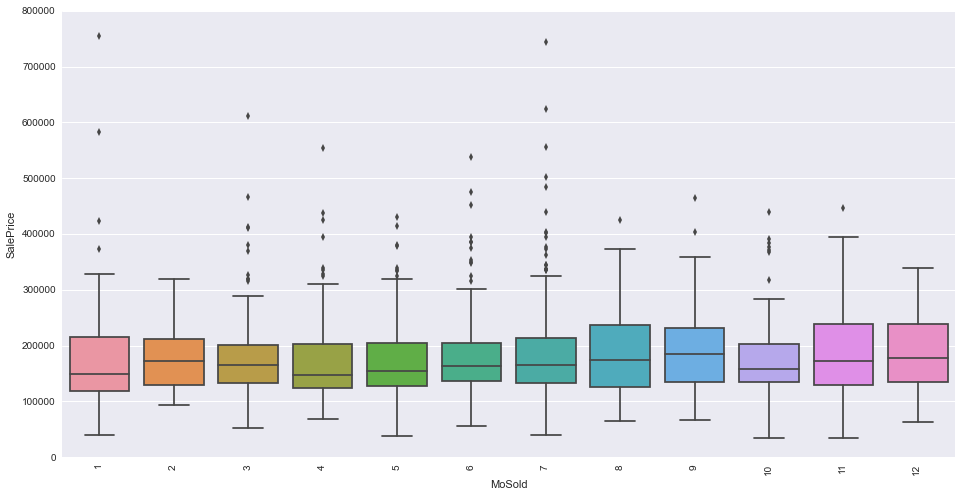

In [71]:
plot_box(train, "MoSold")

In [72]:
train[ ["MoSold", "Id"] ].groupby(["MoSold"], as_index=False).count()

,MoSold,Id
0,1,57
1,2,52
2,3,106
3,4,141
4,5,204
5,6,253
6,7,234
7,8,122
8,9,63
9,10,88


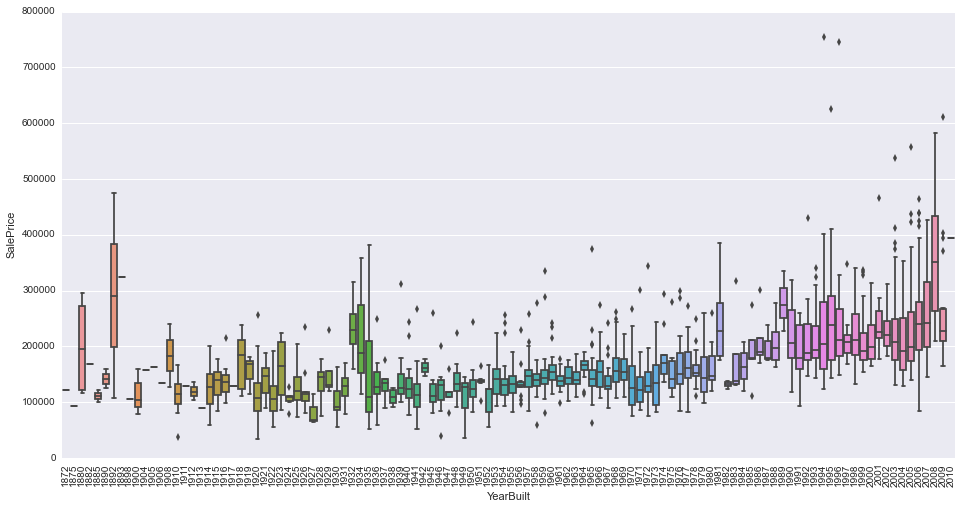

In [73]:
plot_box(train, "YearBuilt")

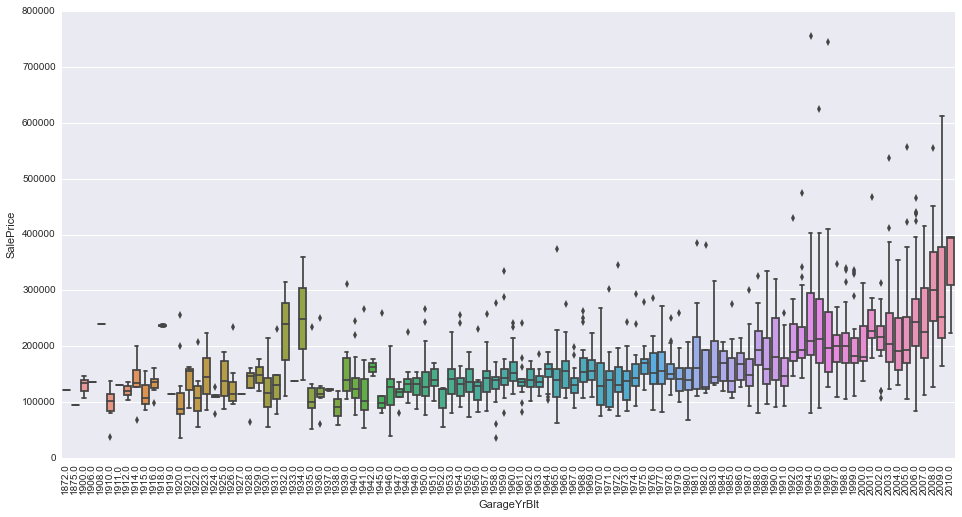

In [74]:
plot_box(train, "GarageYrBlt")

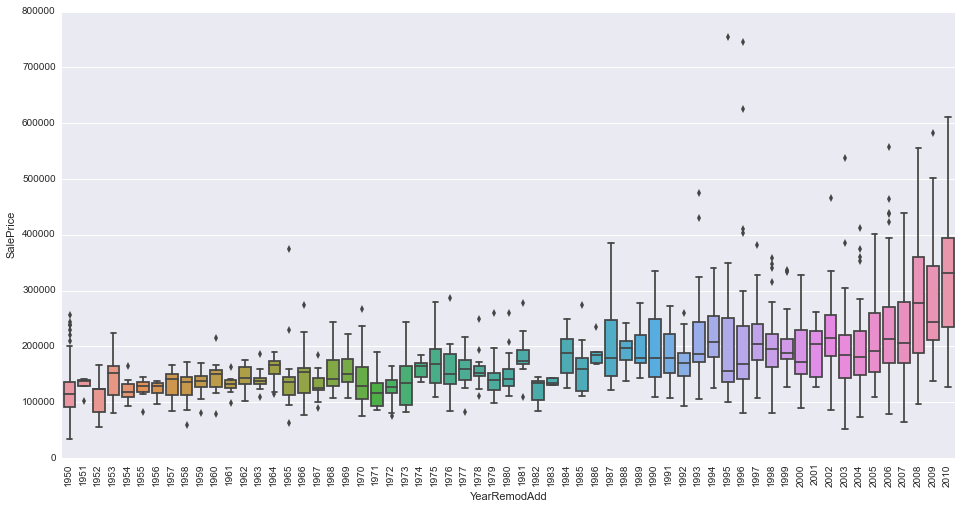

In [75]:
plot_box(train, "YearRemodAdd")

In [76]:
qual_columns = filter(lambda column: column.find("Qu") > 0 or column.find("QC") > 0 or column.find("Cond") > 0, train.columns)
train[qual_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 14 columns):
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
ExterQual        1458 non-null object
ExterCond        1458 non-null object
BsmtQual         1458 non-null object
BsmtCond         1458 non-null object
HeatingQC        1458 non-null object
LowQualFinSF     1458 non-null int64
KitchenQual      1458 non-null object
FireplaceQu      1458 non-null object
GarageQual       1458 non-null object
GarageCond       1458 non-null object
PoolQC           1458 non-null object
SaleCondition    1458 non-null object
dtypes: int64(3), object(11)
memory usage: 170.9+ KB


In [77]:
year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

In [78]:
# Set discrete string value to numerical value
def munge_quality(train, test):
    qual_dict = {None: 0, "NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    bsmt_exposure_dict = {None: 0, "NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
    bsmt_fin_dict = {None: 0, "NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
    function_dict = {None: 0, "NA": 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}
    fence_dict = {None: 0, "NA": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}
    finish_dict = {None: 0,"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}
    
    for dataset in [train, test]:
        dataset["ExterQual"] = dataset["ExterQual"].map(qual_dict).astype(int)
        dataset["ExterCond"] = dataset["ExterCond"].map(qual_dict).astype(int)
        dataset["BsmtQual"] = dataset["BsmtQual"].map(qual_dict).astype(int)
        dataset["BsmtCond"] = dataset["BsmtCond"].map(qual_dict).astype(int)
        dataset["HeatingQC"] = dataset["HeatingQC"].map(qual_dict).astype(int)
        dataset["PoolQC"] = dataset["PoolQC"].map(qual_dict).astype(int)
        dataset["KitchenQual"] = dataset["KitchenQual"].map(qual_dict).astype(int)
        dataset["FireplaceQu"] = dataset["FireplaceQu"].map(qual_dict).astype(int)
        dataset["GarageQual"] = dataset["GarageQual"].map(qual_dict).astype(int)
        dataset["GarageCond"] = dataset["GarageCond"].map(qual_dict).astype(int)
        
        dataset["BsmtExposure"] = dataset["BsmtExposure"].map(bsmt_exposure_dict).astype(int)
        
        dataset["BsmtFinType1"] = dataset["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
        dataset["BsmtFinType2"] = dataset["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
        
        dataset["Functional"] = dataset["Functional"].map(function_dict).astype(int)
        dataset["GarageFinish"] = dataset["GarageFinish"].map(finish_dict).astype(int)
        dataset["Fence"] = dataset["Fence"].map(fence_dict).astype(int)

In [79]:
# Set Year and Month Band
# TODO figure out best band (by DT? evenly? )
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June",
            7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
def set_year_band(train, test):
    for dataset in [train, test]:    
        dataset["YearBuiltBin"] = dataset["YearBuilt"].map(year_map).astype(str)
        dataset["Age"] = 2010 - dataset["YearBuilt"]                
        dataset["GarageYrBltBin"] = dataset["GarageYrBlt"].map(year_map).astype(str)
        dataset.loc[((dataset['MoSold'] > 2) & (dataset['MoSold'] <= 8)), 'SoldSeason'] = "HighSeason"
        dataset.loc[((dataset['MoSold'] > 8) | (dataset['MoSold'] <= 2)), 'SoldSeason'] = "LowSeason" 
        dataset["MoSold"] = dataset["MoSold"].map(month_map).astype(str)
        dataset["YearRemodAddBin"] = dataset["YearRemodAdd"].map(year_map).astype(str)     
        dataset["YrSoldBin"] = dataset["YrSold"].map(year_map).astype(str)
        dataset["TimeSinceSold"] = 2010 - dataset["YrSold"]        

        del dataset["YrSold"]
        del dataset["YearBuilt"]
        del dataset["GarageYrBlt"]
        del dataset["YearRemodAdd"]


In [80]:
# Get dummies for categorical features 
def set_dummies(train, test, columns = []):
    if not columns:
        category_features = filter(lambda x: train[x].dtype == object, train.columns)
    else:
        category_features = columns
    for column in category_features:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column + '_' + i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [81]:
def set_areas(train, test):
    area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]    
    for dataset in [train, test]:
        area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
        dataset["TotalArea"] = dataset[area_cols].sum(axis=1)

        dataset["TotalArea1st2nd"] = dataset["1stFlrSF"] + dataset["2ndFlrSF"]


In [82]:
area_columns = filter(lambda col: col.find("Area") >= 0, train.columns)
print(area_columns)

['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea']


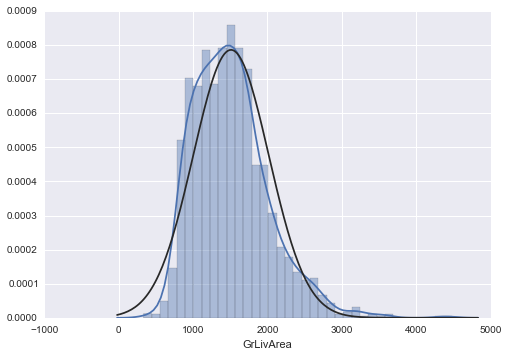

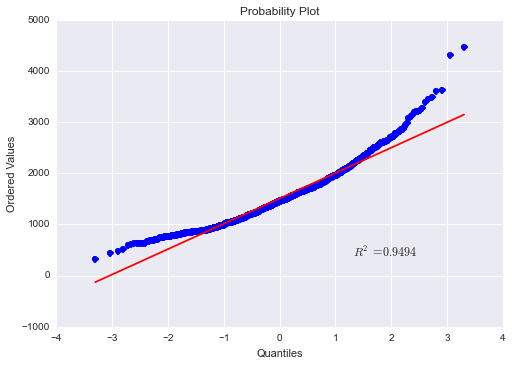

In [83]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(train["GrLivArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train["GrLivArea"], plot=plt)

** GrLiveArea is skewed and it maybe a good idea to transform it by logarithm **

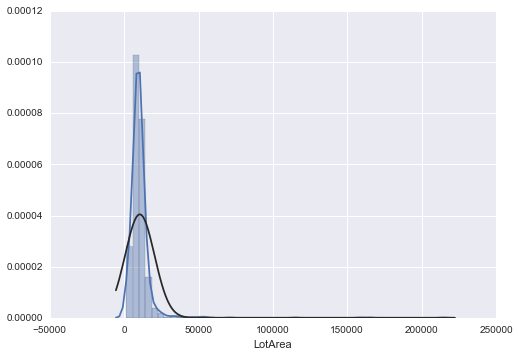

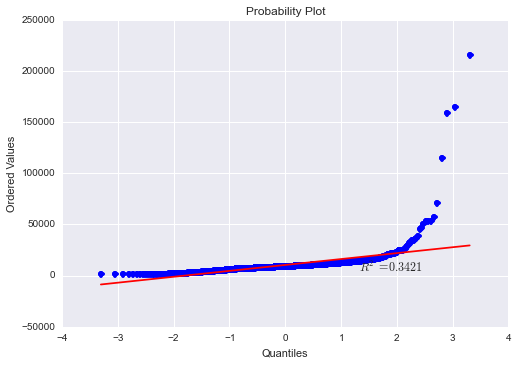

In [84]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(train["LotArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train["LotArea"], plot=plt)

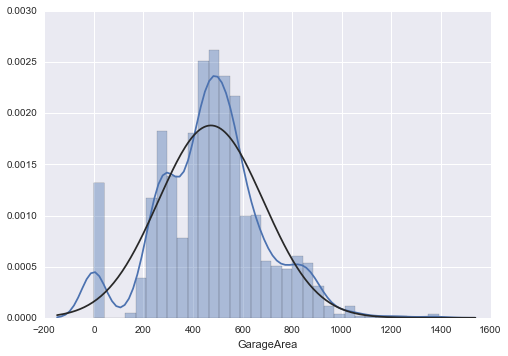

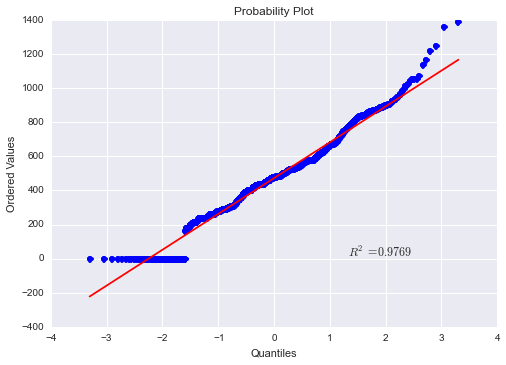

In [85]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(train["GarageArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train["GarageArea"], plot=plt)

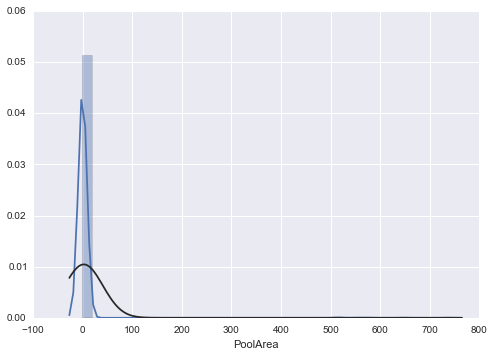

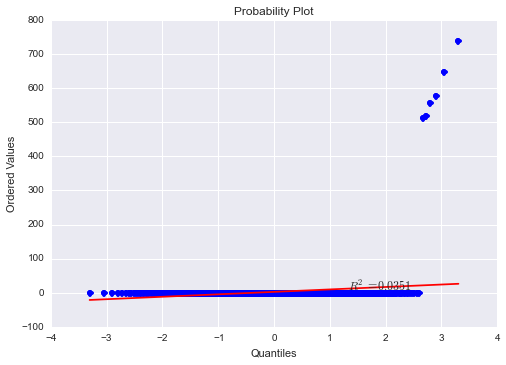

In [86]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(train["PoolArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train["PoolArea"], plot=plt)

In [87]:
munge_quality(train, test)

In [88]:
set_year_band(train, test)

In [89]:
train_stats = check_null(train)
test_stats = check_null(test)
stats = train_stats.join(test_stats, lsuffix='_Train', rsuffix='_Test')
stats.loc[(stats['Total_Null_Train'] > 0 ) | (stats['Total_Null_Test']> 0 )]

,Total_Null_Train,Percent_Null_Train,Total_Null_Test,Percent_Null_Test


In [90]:
train[["Neighborhood", "SalePrice"]].groupby(["Neighborhood"], as_index=False).mean().sort_values(by = "SalePrice", ascending=False)

,Neighborhood,SalePrice
15,NoRidge,335295
16,NridgHt,316270
22,StoneBr,310499
23,Timber,242247
24,Veenker,238772
21,Somerst,225379
4,ClearCr,212565
6,Crawfor,210624
5,CollgCr,197965
0,Blmngtn,194870


In [91]:
neighborhood_map = {
    "MeadowV" : 0,  #  88000
    "IDOTRR" : 1,   # 103000
    "BrDale" : 1,   # 106000
    "OldTown" : 1,  # 119000
    "Edwards" : 1,  # 119500
    "BrkSide" : 1,  # 124300
    "Sawyer" : 1,   # 135000
    "Blueste" : 1,  # 137500
    "SWISU" : 2,    # 139500
    "NAmes" : 2,    # 140000
    "NPkVill" : 2,  # 146000
    "Mitchel" : 2,  # 153500
    "SawyerW" : 2,  # 179900
    "Gilbert" : 2,  # 181000
    "NWAmes" : 2,   # 182900
    "Blmngtn" : 2,  # 191000
    "CollgCr" : 2,  # 197200
    "ClearCr" : 3,  # 200250
    "Crawfor" : 3,  # 200624
    "Veenker" : 3,  # 218000
    "Somerst" : 3,  # 225500
    "Timber" : 3,   # 228475
    "StoneBr" : 4,  # 278000
    "NoRidge" : 4,  # 290000
    "NridgHt" : 4,  # 315000
}
for dataset in [train, test]:
    dataset["NeighborhoodBin"] = dataset["Neighborhood"].map(neighborhood_map).astype(int)

In [92]:
for dataset in [train, test]:
    dataset["MSSubClass"] = dataset["MSSubClass"].astype(str)

In [180]:
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea'
            ]
for dataset in [train, test]:
    dataset["TotalSF"] = dataset[area_cols].sum(axis=1)
    dataset["TotalArea1St2ndSF"] = dataset["1stFlrSF"] + dataset["2ndFlrSF"]

In [181]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

In [182]:
skewed_feats = train[numeric_feats].apply(lambda x: x.skew())
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [183]:
skewed_feats.drop("SalePrice")

Index([u'ExterQual', u'ExterCond', u'BsmtExposure', u'BsmtFinType2',
       u'BsmtFinSF2', u'LowQualFinSF', u'BsmtHalfBath', u'KitchenAbvGr',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'PoolQC',
       u'Fence', u'MiscVal'],
      dtype='object')

** Think about which features should be transformed by log **

In [184]:
# for col in skewed_feats.drop("SalePrice"):
#     train[col] = np.log(1 + train[col])
#     test[col] = np.log(1 + test[col])

In [185]:
# for col in area_cols:
#     train[col] = np.log(1 + train[col])
#     test[col] = np.log(1 + test[col])

In [186]:
train_dummies_2, test_dummies_2 = set_dummies(train, test, [])

## Feature transformation Done

In [187]:
train[["SoldSeason", "Id"]].groupby(["SoldSeason"]).agg(["count"])

,Id
,count
SoldSeason,
HighSeason,1060
LowSeason,398


In [188]:
test[["SoldSeason", "Id"]].groupby(["SoldSeason"]).agg(["count"])

,Id
,count
SoldSeason,
HighSeason,1027
LowSeason,432


In [189]:
train[ ["GarageYrBltBin", "Id"] ].groupby(["GarageYrBltBin"]).agg(["count"])

,Id
,count
GarageYrBltBin,
YearBin1,2
YearBin2,13
YearBin3,95
YearBin4,128
YearBin5,345
YearBin6,290
YearBin7,585


In [190]:
test[ ["GarageYrBltBin", "Id"] ].groupby(["GarageYrBltBin"]).agg(["count"])

,Id
,count
GarageYrBltBin,
YearBin1,2
YearBin2,25
YearBin3,100
YearBin4,119
YearBin5,352
YearBin6,262
YearBin7,598
nan,1


In [191]:
corr_2 = train_dummies_2.corr()
corr_2["Target"].sort_values(ascending=False)[:40]

Target                      1.000000
SalePrice                   0.948395
OverallQual                 0.821404
GrLivArea                   0.737431
NeighborhoodBin             0.704030
TotalSF                     0.690967
ExterQual                   0.682225
GarageCars                  0.681033
KitchenQual                 0.669989
BsmtQual                    0.616897
1stFlrSF                    0.615408
GarageFinish                0.605602
FullBath                    0.595899
YearBuiltBin_YearBin7       0.587546
GarageYrBltBin_YearBin7     0.552237
FireplaceQu                 0.546791
TotRmsAbvGrd                0.537702
Foundation_PConc            0.531193
YearRemodAddBin_YearBin7    0.497407
Fireplaces                  0.491998
HeatingQC                   0.473938
OpenPorchSF                 0.460623
GarageArea                  0.455088
GarageType_Attchd           0.416377
MasVnrArea                  0.413996
LotArea                     0.402820
MSSubClass_60               0.402376
T

In [192]:
train[["NeighborhoodBin", "SalePrice"]].groupby(["NeighborhoodBin"], as_index=False).mean().sort_values(by = "SalePrice", ascending=False)

,NeighborhoodBin,SalePrice
4,4,320716
3,3,223870
2,2,172554
1,1,125580
0,0,98576


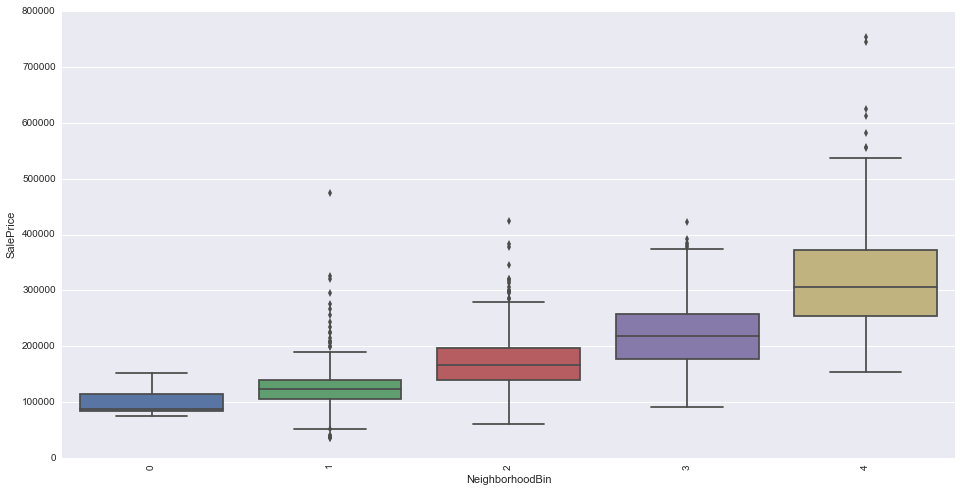

In [193]:
plot_box(train, "NeighborhoodBin")

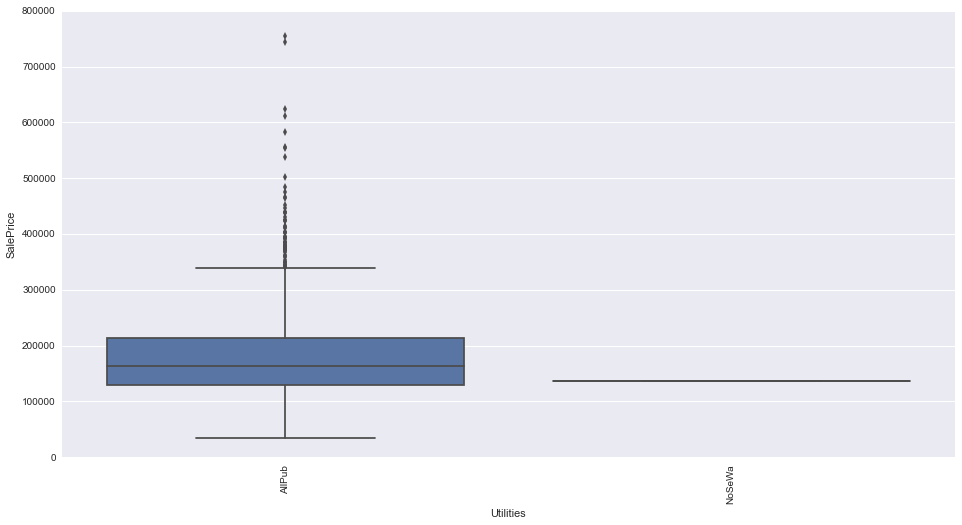

In [194]:
plot_box(train, "Utilities")

In [195]:
print("\n".join(train_dummies_2.columns))

Id
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
HeatingQC
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscVal
SalePrice
Target
Age
TimeSinceSold
NeighborhoodBin
TotalSF
TotalArea1St2ndSF
MSSubClass_60
MSSubClass_20
MSSubClass_70
MSSubClass_50
MSSubClass_190
MSSubClass_45
MSSubClass_90
MSSubClass_120
MSSubClass_30
MSSubClass_85
MSSubClass_80
MSSubClass_160
MSSubClass_75
MSSubClass_180
MSSubClass_40
MSZoning_RL
MSZoning_RM
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
Street_Pave
Street_Grvl
Alley_NA
Alley_Grvl
Alley_Pave
LotShape_Reg
LotShape_IR1
LotShape_IR2
LotShape_IR3
LandContour_Lvl
LandContour_Bnk


# Modeling

In [196]:
y = train_dummies_2["Target"]
X = train_dummies_2.drop( ["Target", "SalePrice", "Id"], axis = 1 )
X_test = test_dummies_2.drop( ["Id"], axis = 1)

In [197]:
X.shape

(1458, 264)

In [198]:
X_test.shape

(1459, 264)

In [258]:
from sklearn.model_selection import train_test_split
num_test = 0.50
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=num_test, random_state=23)

### Run K-Fold

In [235]:
from sklearn.cross_validation import KFold
from sklearn.metrics import  mean_squared_error

train_size = X.shape[0]
def run_kfold(clf, X, y, n_folds = 10):
    kf = KFold(train_size, n_folds)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        predictions = clf.predict(X_test)
        accuracy = sqrt(mean_squared_error(y_test, predictions))
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [201]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': np.logspace(-5, -1, 5) }
lasso = Lasso()
grid_search = GridSearchCV(lasso, parameters)
grid_search = grid_search.fit(X_train, y_train)
lasso = grid_search.best_estimator_

lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
print("Lasso %.4f" % np.sqrt(mean_squared_error(y, y_pred_lasso)))

Lasso 0.1055


In [202]:
lasso.alpha

0.001

In [203]:
coef = lasso.coef_
lasso_features = pd.DataFrame({"features": X.columns, "coef": coef, "import": np.abs(coef)})
lasso_features.sort_values([ 'import' ] , ascending = False)

,coef,features,import
20,0.311654,GrLivArea,0.311654
68,-0.161644,MSZoning_C (all),0.161644
17,0.113256,1stFlrSF,0.113256
1,0.071719,LotArea,0.071719
101,0.060590,Neighborhood_BrkSide,0.060590
2,0.056913,OverallQual,0.056913
238,-0.053157,SaleCondition_Abnorml,0.053157
48,0.048352,NeighborhoodBin,0.048352
229,0.048007,SaleType_New,0.048007
3,0.041835,OverallCond,0.041835


In [204]:
y_lasso = lasso.predict(X_test)

In [237]:
run_kfold(lasso, X, y, 10)

Fold 1 accuracy: 0.10702320988
Fold 2 accuracy: 0.090684519536
Fold 3 accuracy: 0.100522753678
Fold 4 accuracy: 0.111050129617
Fold 5 accuracy: 0.127642850104
Fold 6 accuracy: 0.0974911685646
Fold 7 accuracy: 0.113165360957
Fold 8 accuracy: 0.0942235907193
Fold 9 accuracy: 0.092014142122
Fold 10 accuracy: 0.114907726653
Mean Accuracy: 0.104872545183


In [205]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# I found this best alpha through cross-validation.
parameters = {'alpha': np.logspace(-5, 5, 11) }
ridge = Ridge()

grid_search = GridSearchCV(ridge, parameters)
grid_search = grid_search.fit(X_train, y_train)
ridge = grid_search.best_estimator_

ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
print("Ridge %.4f" % np.sqrt(mean_squared_error(y, y_pred_ridge)))

Ridge 0.0985


In [206]:
ridge.alpha

10.0

In [207]:
coef = ridge.coef_
ridge_features = pd.DataFrame({"features": X.columns, "coef": coef, "import": np.abs(coef)})
ridge_features.sort_values([ 'import' ] , ascending = False)

,coef,features,import
20,0.162574,GrLivArea,0.162574
68,-0.130226,MSZoning_C (all),0.130226
17,0.112530,1stFlrSF,0.112530
18,-0.062202,2ndFlrSF,0.062202
1,0.059961,LotArea,0.059961
101,0.058571,Neighborhood_BrkSide,0.058571
158,0.058304,Exterior1st_BrkFace,0.058304
151,0.053343,RoofMatl_WdShngl,0.053343
2,0.052768,OverallQual,0.052768
50,0.050327,TotalArea1St2ndSF,0.050327


In [208]:
y_ridge = ridge.predict(X_test)

In [238]:
run_kfold(ridge, X, y, 10)

Fold 1 accuracy: 0.0988635705321
Fold 2 accuracy: 0.085183450204
Fold 3 accuracy: 0.0945491533186
Fold 4 accuracy: 0.108640443073
Fold 5 accuracy: 0.116210077833
Fold 6 accuracy: 0.0861278247404
Fold 7 accuracy: 0.103957509851
Fold 8 accuracy: 0.0867361692555
Fold 9 accuracy: 0.0843563202887
Fold 10 accuracy: 0.11308498185
Mean Accuracy: 0.0977709500946


In [252]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=7200,
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)
xgboost.fit(X, y)
y_pred_xgboost = xgboost.predict(X)
print("XGBoost Regressor %.4f" % np.sqrt(mean_squared_error(y, y_pred_xgboost)))

XGBoost Regressor 0.0415


In [259]:
xgboost.fit(X_train, y_train)
y_pred_cv = xgboost.predict(X_cv.as_matrix())
print("XGBoost Regressor %.4f" % np.sqrt(mean_squared_error(y_cv, y_pred_cv)))

ValueError: feature_names mismatch: [u'LotFrontage', u'LotArea', u'OverallQual', u'OverallCond', u'MasVnrArea', u'ExterQual', u'ExterCond', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'HeatingQC', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQual', u'GarageCond', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'PoolQC', u'Fence', u'MiscVal', u'Age', u'TimeSinceSold', u'NeighborhoodBin', u'TotalSF', u'TotalArea1St2ndSF', u'MSSubClass_60', u'MSSubClass_20', u'MSSubClass_70', u'MSSubClass_50', u'MSSubClass_190', u'MSSubClass_45', u'MSSubClass_90', u'MSSubClass_120', u'MSSubClass_30', u'MSSubClass_85', u'MSSubClass_80', u'MSSubClass_160', u'MSSubClass_75', u'MSSubClass_180', u'MSSubClass_40', u'MSZoning_RL', u'MSZoning_RM', u'MSZoning_C (all)', u'MSZoning_FV', u'MSZoning_RH', u'Street_Pave', u'Street_Grvl', u'Alley_NA', u'Alley_Grvl', u'Alley_Pave', u'LotShape_Reg', u'LotShape_IR1', u'LotShape_IR2', u'LotShape_IR3', u'LandContour_Lvl', u'LandContour_Bnk', u'LandContour_Low', u'LandContour_HLS', u'Utilities_AllPub', u'LotConfig_Inside', u'LotConfig_FR2', u'LotConfig_Corner', u'LotConfig_CulDSac', u'LotConfig_FR3', u'LandSlope_Gtl', u'LandSlope_Mod', u'LandSlope_Sev', u'Neighborhood_CollgCr', u'Neighborhood_Veenker', u'Neighborhood_Crawfor', u'Neighborhood_NoRidge', u'Neighborhood_Mitchel', u'Neighborhood_Somerst', u'Neighborhood_NWAmes', u'Neighborhood_OldTown', u'Neighborhood_BrkSide', u'Neighborhood_Sawyer', u'Neighborhood_NridgHt', u'Neighborhood_NAmes', u'Neighborhood_SawyerW', u'Neighborhood_IDOTRR', u'Neighborhood_MeadowV', u'Neighborhood_Edwards', u'Neighborhood_Timber', u'Neighborhood_Gilbert', u'Neighborhood_StoneBr', u'Neighborhood_ClearCr', u'Neighborhood_NPkVill', u'Neighborhood_Blmngtn', u'Neighborhood_BrDale', u'Neighborhood_SWISU', u'Neighborhood_Blueste', u'Condition1_Norm', u'Condition1_Feedr', u'Condition1_PosN', u'Condition1_Artery', u'Condition1_RRAe', u'Condition1_RRNn', u'Condition1_RRAn', u'Condition1_PosA', u'Condition1_RRNe', u'Condition2_Norm', u'Condition2_Artery', u'Condition2_Feedr', u'Condition2_PosA', u'Condition2_PosN', u'BldgType_1Fam', u'BldgType_2fmCon', u'BldgType_Duplex', u'BldgType_TwnhsE', u'BldgType_Twnhs', u'HouseStyle_2Story', u'HouseStyle_1Story', u'HouseStyle_1.5Fin', u'HouseStyle_1.5Unf', u'HouseStyle_SFoyer', u'HouseStyle_SLvl', u'HouseStyle_2.5Unf', u'RoofStyle_Gable', u'RoofStyle_Hip', u'RoofStyle_Gambrel', u'RoofStyle_Mansard', u'RoofStyle_Flat', u'RoofStyle_Shed', u'RoofMatl_CompShg', u'RoofMatl_WdShngl', u'RoofMatl_WdShake', u'RoofMatl_Tar&Grv', u'Exterior1st_VinylSd', u'Exterior1st_MetalSd', u'Exterior1st_Wd Sdng', u'Exterior1st_HdBoard', u'Exterior1st_BrkFace', u'Exterior1st_WdShing', u'Exterior1st_CemntBd', u'Exterior1st_Plywood', u'Exterior1st_AsbShng', u'Exterior1st_Stucco', u'Exterior1st_BrkComm', u'Exterior1st_AsphShn', u'Exterior1st_CBlock', u'Exterior2nd_VinylSd', u'Exterior2nd_MetalSd', u'Exterior2nd_Wd Shng', u'Exterior2nd_HdBoard', u'Exterior2nd_Plywood', u'Exterior2nd_Wd Sdng', u'Exterior2nd_CmentBd', u'Exterior2nd_BrkFace', u'Exterior2nd_Stucco', u'Exterior2nd_AsbShng', u'Exterior2nd_Brk Cmn', u'Exterior2nd_ImStucc', u'Exterior2nd_AsphShn', u'Exterior2nd_Stone', u'Exterior2nd_CBlock', u'MasVnrType_BrkFace', u'MasVnrType_None', u'MasVnrType_Stone', u'MasVnrType_BrkCmn', u'Foundation_PConc', u'Foundation_CBlock', u'Foundation_BrkTil', u'Foundation_Wood', u'Foundation_Slab', u'Foundation_Stone', u'Heating_GasA', u'Heating_GasW', u'Heating_Grav', u'Heating_Wall', u'CentralAir_Y', u'CentralAir_N', u'Electrical_SBrkr', u'Electrical_FuseF', u'Electrical_FuseA', u'Electrical_FuseP', u'GarageType_Attchd', u'GarageType_Detchd', u'GarageType_BuiltIn', u'GarageType_CarPort', u'GarageType_NA', u'GarageType_Basment', u'GarageType_2Types', u'PavedDrive_Y', u'PavedDrive_N', u'PavedDrive_P', u'MiscFeature_NA', u'MiscFeature_Shed', u'MiscFeature_Gar2', u'MiscFeature_Othr', u'MoSold_Feb', u'MoSold_May', u'MoSold_Sep', u'MoSold_Dec', u'MoSold_Oct', u'MoSold_Aug', u'MoSold_Nov', u'MoSold_Apr', u'MoSold_Jan', u'MoSold_July', u'MoSold_Mar', u'MoSold_June', u'SaleType_WD', u'SaleType_New', u'SaleType_COD', u'SaleType_ConLD', u'SaleType_ConLI', u'SaleType_CWD', u'SaleType_ConLw', u'SaleType_Con', u'SaleType_Oth', u'SaleCondition_Normal', u'SaleCondition_Abnorml', u'SaleCondition_Partial', u'SaleCondition_AdjLand', u'SaleCondition_Alloca', u'SaleCondition_Family', u'YearBuiltBin_YearBin7', u'YearBuiltBin_YearBin6', u'YearBuiltBin_YearBin3', u'YearBuiltBin_YearBin4', u'YearBuiltBin_YearBin5', u'YearBuiltBin_YearBin2', u'YearBuiltBin_YearBin1', u'GarageYrBltBin_YearBin7', u'GarageYrBltBin_YearBin6', u'GarageYrBltBin_YearBin4', u'GarageYrBltBin_YearBin5', u'GarageYrBltBin_YearBin3', u'GarageYrBltBin_YearBin2', u'GarageYrBltBin_YearBin1', u'SoldSeason_LowSeason', u'SoldSeason_HighSeason', u'YearRemodAddBin_YearBin7', u'YearRemodAddBin_YearBin6', u'YearRemodAddBin_YearBin5', u'YearRemodAddBin_YearBin4', u'YrSoldBin_YearBin7'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263']
expected KitchenQual, HouseStyle_SFoyer, GarageFinish, SaleType_ConLw, Exterior1st_Wd Sdng, Condition2_Artery, Condition1_RRAe, SaleCondition_AdjLand, MoSold_June, Neighborhood_Mitchel, Condition1_RRAn, Exterior1st_AsbShng, TotalArea1St2ndSF, SaleType_Con, YrSoldBin_YearBin7, EnclosedPorch, Exterior2nd_Stucco, Exterior2nd_Wd Sdng, GarageCond, Exterior2nd_AsbShng, MSSubClass_70, LotFrontage, MSSubClass_80, RoofMatl_Tar&Grv, KitchenAbvGr, MSSubClass_50, TotalSF, Neighborhood_MeadowV, SaleType_ConLI, Neighborhood_NoRidge, Exterior2nd_MetalSd, BldgType_2fmCon, OpenPorchSF, SaleType_ConLD, LotConfig_Corner, MasVnrType_BrkFace, FullBath, SaleType_Oth, Condition1_RRNn, SaleType_COD, BsmtFinType2, BsmtFinType1, Neighborhood_Blueste, Condition1_RRNe, PoolArea, Foundation_Stone, Exterior2nd_VinylSd, LotArea, MSSubClass_40, GarageType_Attchd, Functional, LandContour_HLS, SaleCondition_Family, LotConfig_Inside, PoolQC, LandContour_Lvl, RoofStyle_Gable, RoofMatl_WdShngl, LandContour_Low, Condition1_Artery, Heating_Grav, SaleCondition_Abnorml, GarageYrBltBin_YearBin7, MoSold_Feb, 2ndFlrSF, MoSold_July, Neighborhood_Blmngtn, MSSubClass_45, OverallCond, Exterior2nd_CmentBd, GarageType_Basment, BsmtQual, HouseStyle_1.5Unf, Exterior2nd_AsphShn, MiscFeature_NA, CentralAir_Y, Exterior1st_Plywood, 1stFlrSF, Neighborhood_SWISU, BldgType_Twnhs, BsmtCond, Neighborhood_BrDale, MiscVal, Street_Pave, OverallQual, Neighborhood_CollgCr, Neighborhood_Gilbert, BsmtHalfBath, NeighborhoodBin, CentralAir_N, TotRmsAbvGrd, Electrical_FuseA, MSSubClass_30, LowQualFinSF, MiscFeature_Othr, Condition2_PosN, GarageType_2Types, LotShape_IR1, Condition2_PosA, Neighborhood_NWAmes, Condition1_Feedr, Exterior1st_CemntBd, HouseStyle_SLvl, MSZoning_C (all), MasVnrType_None, SaleCondition_Partial, Exterior1st_VinylSd, Neighborhood_IDOTRR, RoofStyle_Hip, Neighborhood_Timber, LandSlope_Sev, Foundation_Slab, PavedDrive_Y, Neighborhood_NridgHt, Condition2_Feedr, PavedDrive_P, ExterQual, Exterior2nd_HdBoard, Exterior1st_BrkComm, SaleType_CWD, GarageArea, Age, SaleType_New, RoofStyle_Shed, MSZoning_FV, MSSubClass_20, Foundation_BrkTil, 3SsnPorch, MSSubClass_180, LandContour_Bnk, Exterior2nd_Plywood, Heating_GasW, Exterior2nd_Brk Cmn, Alley_Pave, Neighborhood_Edwards, BldgType_TwnhsE, Neighborhood_NPkVill, LotConfig_CulDSac, BsmtExposure, GrLivArea, MoSold_Oct, MSSubClass_90, HeatingQC, Electrical_FuseP, TotalBsmtSF, Alley_Grvl, Exterior2nd_ImStucc, Alley_NA, Electrical_SBrkr, BldgType_1Fam, Neighborhood_Crawfor, HouseStyle_1Story, Electrical_FuseF, Utilities_AllPub, Neighborhood_StoneBr, BsmtUnfSF, MasVnrType_Stone, TimeSinceSold, MasVnrType_BrkCmn, MoSold_Sep, Exterior1st_BrkFace, GarageYrBltBin_YearBin2, GarageYrBltBin_YearBin1, ScreenPorch, Exterior1st_CBlock, Neighborhood_ClearCr, GarageYrBltBin_YearBin5, Foundation_CBlock, FireplaceQu, BldgType_Duplex, Condition1_Norm, MSSubClass_85, LandSlope_Mod, Condition2_Norm, GarageType_CarPort, Exterior2nd_CBlock, Fence, Heating_Wall, MoSold_Aug, Neighborhood_OldTown, RoofStyle_Gambrel, Exterior1st_Stucco, Neighborhood_Sawyer, Neighborhood_Somerst, YearRemodAddBin_YearBin5, YearRemodAddBin_YearBin4, YearRemodAddBin_YearBin7, YearRemodAddBin_YearBin6, Neighborhood_Veenker, GarageQual, BedroomAbvGr, RoofStyle_Flat, HalfBath, HouseStyle_1.5Fin, RoofMatl_WdShake, MSSubClass_190, MoSold_Mar, SaleCondition_Normal, MSZoning_RM, MSZoning_RL, MoSold_Dec, MoSold_May, Exterior2nd_Wd Shng, MasVnrArea, Foundation_PConc, MiscFeature_Shed, Exterior1st_HdBoard, LandSlope_Gtl, LotShape_Reg, MSSubClass_160, WoodDeckSF, MoSold_Nov, GarageYrBltBin_YearBin3, BsmtFullBath, Condition1_PosA, MSSubClass_75, Exterior2nd_Stone, Neighborhood_BrkSide, MSZoning_RH, Condition1_PosN, SoldSeason_HighSeason, PavedDrive_N, GarageType_BuiltIn, SaleType_WD, Neighborhood_NAmes, SoldSeason_LowSeason, MSSubClass_120, MoSold_Apr, GarageYrBltBin_YearBin6, GarageCars, RoofStyle_Mansard, RoofMatl_CompShg, HouseStyle_2Story, GarageType_Detchd, LotConfig_FR3, Exterior1st_WdShing, GarageYrBltBin_YearBin4, Heating_GasA, BsmtFinSF1, BsmtFinSF2, Exterior1st_MetalSd, Exterior1st_AsphShn, LotConfig_FR2, YearBuiltBin_YearBin7, Exterior2nd_BrkFace, Fireplaces, MoSold_Jan, Foundation_Wood, ExterCond, GarageType_NA, Street_Grvl, LotShape_IR3, Neighborhood_SawyerW, MSSubClass_60, HouseStyle_2.5Unf, MiscFeature_Gar2, YearBuiltBin_YearBin4, YearBuiltBin_YearBin5, YearBuiltBin_YearBin6, SaleCondition_Alloca, LotShape_IR2, YearBuiltBin_YearBin1, YearBuiltBin_YearBin2, YearBuiltBin_YearBin3 in input data
training data did not have the following fields: f169, f168, f161, f160, f163, f162, f165, f164, f167, f166, f6, f126, f41, f40, f43, f42, f45, f44, f47, f46, f49, f48, f208, f209, f217, f195, f215, f197, f118, f119, f114, f115, f116, f117, f110, f111, f112, f113, f56, f57, f54, f55, f52, f53, f50, f51, f193, f198, f199, f219, f59, f210, f60, f192, f0, f58, f109, f108, f107, f106, f105, f104, f103, f102, f101, f100, f187, f186, f185, f184, f183, f182, f181, f180, f243, f228, f229, f189, f188, f23, f22, f21, f20, f27, f26, f25, f24, f194, f29, f28, f204, f205, f206, f173, f138, f139, f132, f133, f130, f131, f136, f137, f134, f135, f239, f202, f235, f234, f237, f203, f231, f230, f233, f216, f30, f31, f32, f33, f34, f196, f36, f37, f38, f39, f87, f125, f124, f127, f214, f121, f120, f123, f122, f81, f129, f128, f85, f3, f83, f236, f4, f82, f1, f5, f248, f213, f218, f89, f88, f240, f84, f242, f86, f244, f245, f246, f247, f190, f212, f150, f151, f152, f153, f154, f155, f156, f157, f158, f159, f191, f92, f93, f90, f91, f96, f97, f94, f95, f98, f99, f211, f238, f259, f258, f7, f253, f252, f251, f250, f257, f256, f255, f254, f207, f18, f19, f12, f13, f10, f11, f16, f17, f14, f15, f143, f142, f2, f140, f147, f146, f145, f144, f8, f9, f149, f148, f200, f262, f263, f260, f261, f232, f141, f179, f80, f201, f69, f68, f67, f66, f65, f64, f63, f62, f61, f35, f222, f178, f223, f176, f177, f174, f175, f172, f220, f170, f171, f221, f226, f241, f227, f224, f225, f249, f78, f79, f74, f75, f76, f77, f70, f71, f72, f73

In [255]:
X_cv.shape

(292, 264)

In [256]:
X.shape

(1458, 264)

In [210]:
feature_imp = pd.concat((pd.DataFrame(X.columns, columns = ["variable"]),
                         pd.DataFrame(xgboost.feature_importances_, columns = ["importance"])),
                        axis = 1).sort_values(by="importance", ascending = False)

In [211]:
feature_imp

,variable,importance
1,LotArea,0.034200
49,TotalSF,0.029206
20,GrLivArea,0.028817
0,LotFrontage,0.027691
14,BsmtUnfSF,0.027650
17,1stFlrSF,0.025870
46,Age,0.024887
15,TotalBsmtSF,0.024785
50,TotalArea1St2ndSF,0.024314
34,GarageArea,0.023250


In [212]:
y_xgboost = xgboost.predict(X_test)

In [213]:
y_pred = 0.5 * y_pred_xgboost + 0 * y_pred_ridge + 0.5 * y_pred_lasso
print("Model average %.4f" % np.sqrt(mean_squared_error(y, y_pred)))

Model average 0.0698


In [214]:
y_pred = 0.67 * y_pred_xgboost + 0.16 * y_pred_ridge + 0.17 * y_pred_lasso
print("Model average %.4f" % np.sqrt(mean_squared_error(y, y_pred)))

Model average 0.0577


In [215]:
y_avg = (0.5 * y_xgboost + 0 * y_ridge + 0.5 * y_lasso)
predictions = pd.DataFrame({"Id": test.Id, "SalePrice": np.exp(y_avg)})
predictions.to_csv("../output/avg.csv", sep=",", index = False)

## Stacking

In [216]:
NFOLDS = 4
SEED = 0
NROWS = None

In [217]:
y = train_dummies_2["Target"]
X = train_dummies_2.drop( ["Target", "SalePrice", "Id"], axis = 1 )
X_test = test_dummies_2.drop( ["Id"], axis = 1)

In [218]:
all_data = pd.concat((X, X_test))

In [219]:
ntrain = train_dummies_2.shape[0]
ntest = test_dummies_2.shape[0]
kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=SEED)

In [220]:
x_train = np.array(all_data[:ntrain])
y_train = np.array(y)
x_test = np.array(all_data[ntrain:])

In [221]:
from scipy.stats import skew
import xgboost as xgb
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso
from math import sqrt
class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))

In [222]:
def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [223]:
et_params = {
    'n_jobs': 16,
    'n_estimators': 100,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 100,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'reg:linear',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'rmse',
    'nrounds': 500
}


rd_params={
    'alpha': 10
}


ls_params={
    'alpha': 0.005
}


xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
rd = SklearnWrapper(clf=Ridge, seed=SEED, params=rd_params)
ls = SklearnWrapper(clf=Lasso, seed=SEED, params=ls_params)

In [224]:
xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
rd_oof_train, rd_oof_test = get_oof(rd)
ls_oof_train, ls_oof_test = get_oof(ls)

print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("RD-CV: {}".format(sqrt(mean_squared_error(y_train, rd_oof_train))))
print("LS-CV: {}".format(sqrt(mean_squared_error(y_train, ls_oof_train))))


x_train = np.concatenate((xg_oof_train, et_oof_train, rf_oof_train, rd_oof_train, ls_oof_train), axis=1)
x_test = np.concatenate((xg_oof_test, et_oof_test, rf_oof_test, rd_oof_test, ls_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.8,
    'silent': 1,
    'subsample': 0.6,
    'learning_rate': 0.01,
    'objective': 'reg:linear',
    'max_depth': 1,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'rmse',
}

res = xgb.cv(xgb_params, dtrain, num_boost_round=1000, nfold=4, seed=SEED, stratified=False,
             early_stopping_rounds=25, verbose_eval=10, show_stdv=True)

best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]

print('Ensemble-CV: {0}+{1}'.format(cv_mean, cv_std))

gbdt = xgb.train(xgb_params, dtrain, best_nrounds)

XG-CV: 0.121876827563
ET-CV: 0.136079809532
RF-CV: 0.132809304202
RD-CV: 0.115396687484
LS-CV: 0.125860350203
(1458, 5),(1459, 5)
[0]	train-rmse:11.4159+0.00662082	test-rmse:11.4159+0.0200582
[10]	train-rmse:10.3273+0.00572169	test-rmse:10.3273+0.0210191
[20]	train-rmse:9.34276+0.00517429	test-rmse:9.34274+0.0216429
[30]	train-rmse:8.45236+0.00479351	test-rmse:8.45234+0.0220881
[40]	train-rmse:7.64725+0.00468629	test-rmse:7.64726+0.0220517
[50]	train-rmse:6.91917+0.00415487	test-rmse:6.91954+0.0204538
[60]	train-rmse:6.26052+0.0036446	test-rmse:6.26078+0.0187331
[70]	train-rmse:5.66472+0.00320547	test-rmse:5.66476+0.017369
[80]	train-rmse:5.12579+0.00291458	test-rmse:5.12559+0.0158742
[90]	train-rmse:4.63831+0.00270713	test-rmse:4.63808+0.01488
[100]	train-rmse:4.19726+0.00254544	test-rmse:4.19697+0.0141555
[110]	train-rmse:3.79841+0.00228083	test-rmse:3.79801+0.0135347
[120]	train-rmse:3.4376+0.00202149	test-rmse:3.43698+0.013358
[130]	train-rmse:3.11135+0.00186249	test-rmse:3.11085+0

In [225]:
salePrice = gbdt.predict(dtest)
submission = pd.DataFrame({"Id": test.Id, "SalePrice": np.exp(salePrice)})
submission.to_csv("../output/xgstacker_starter.sub.csv", index=None)